In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [10]:
df = pd.read_csv('hospitalizaciones_train.csv')
df['Stay'] = 0
df.loc[df['Stay (in days)'] > 8, 'Stay'] = 1

In [4]:
le = preprocessing.LabelEncoder()
enc = preprocessing.OneHotEncoder(sparse=False)

In [6]:
df.head(1)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days),Stay
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8,0


In [11]:
df['Type of Admission'] = le.fit_transform(df['Type of Admission'])
df['Severity of Illness'] = le.fit_transform(df['Severity of Illness'])
df['Age'] = le.fit_transform(df['Age'])
df['Department'] = le.fit_transform(df['Department'])
df['doctor_name'] = le.fit_transform(df['doctor_name'])
df['gender'] = le.fit_transform(df['gender'])
df['health_conditions'] = le.fit_transform(df['health_conditions'])
df['Insurance'] = le.fit_transform(df['Insurance'])
df['Ward_Facility_Code'] = le.fit_transform(df['Ward_Facility_Code'])

In [16]:
df.drop(columns=['patientid', 'Admission_Deposit', 'Stay (in days)'], inplace=True)

In [14]:
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(20,20))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

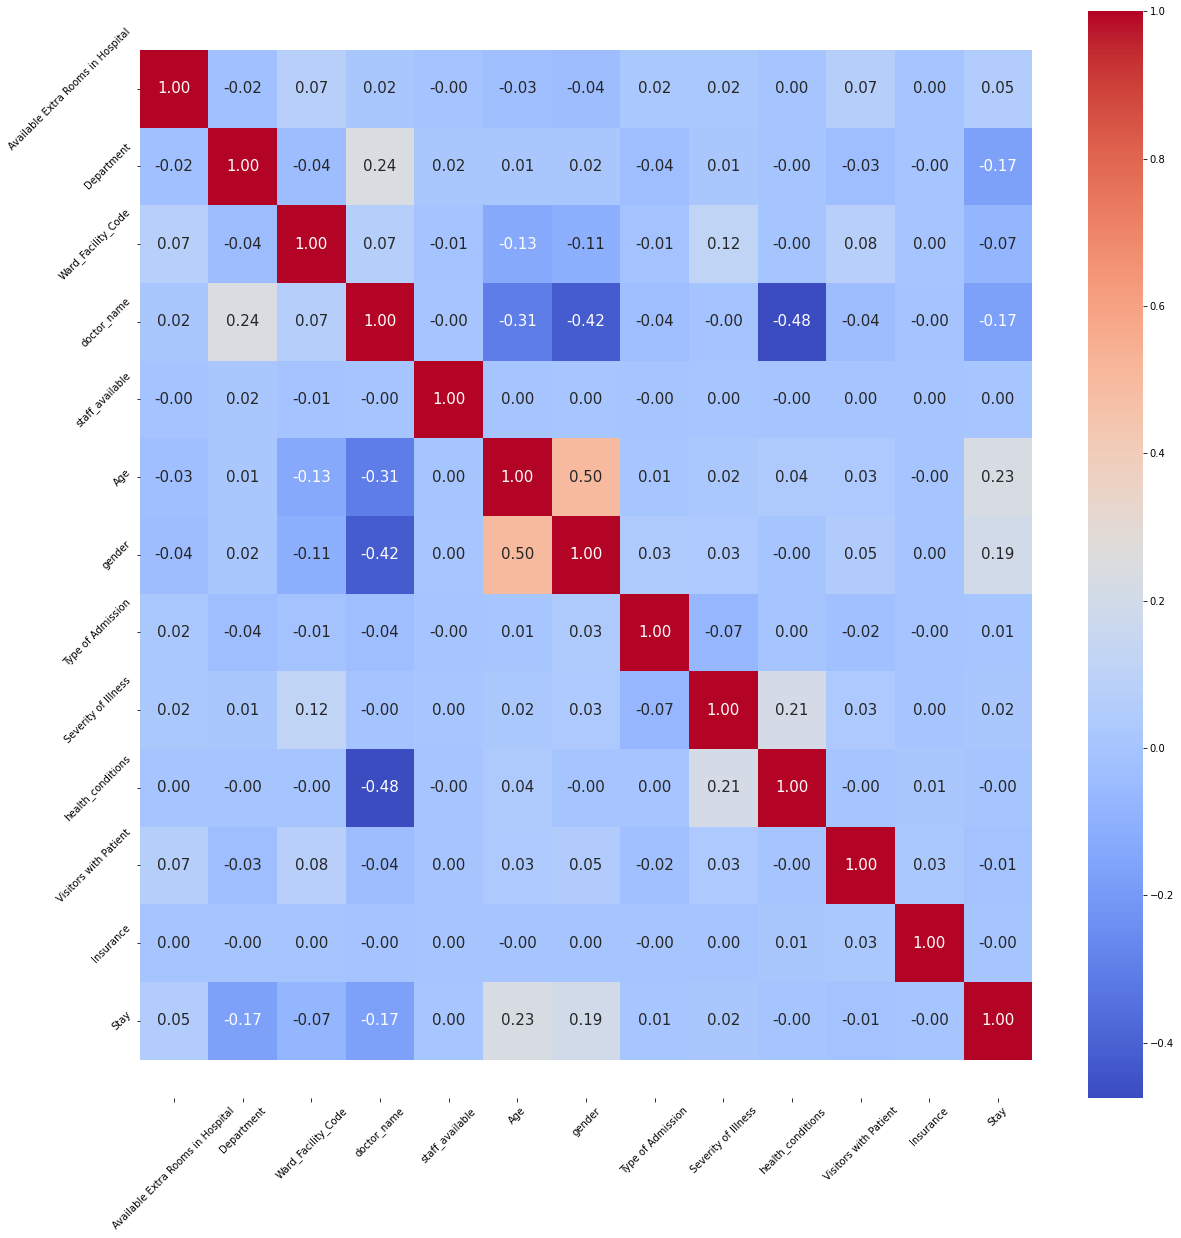

In [17]:
corr = df.corr()
plot_corre_heatmap(corr)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Creamos un objeto arbol
tree = DecisionTreeClassifier()

In [30]:
X= df[['Age','gender']]
y = df['Stay']

In [22]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
tree.fit(X, y)

DecisionTreeClassifier()

In [24]:
from sklearn.metrics import accuracy_score

# Predecimos sobre nuestro set de entrenamieto
y_train_pred = tree.predict(X_train)

# Predecimos sobre nuestro set de test
y_test_pred = tree.predict(X_test)

# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.6372260647979614
Accuracy sobre conjunto de Test: 0.637819660014782


In [40]:
df_pred = pd.read_csv('hospitalizaciones_test.csv')
df_pred['Type of Admission'] = le.fit_transform(df_pred['Type of Admission'])
df_pred['Severity of Illness'] = le.fit_transform(df_pred['Severity of Illness'])
df_pred['Age'] = le.fit_transform(df_pred['Age'])
df_pred['Department'] = le.fit_transform(df_pred['Department'])
df_pred['doctor_name'] = le.fit_transform(df_pred['doctor_name'])
df_pred['gender'] = le.fit_transform(df_pred['gender'])
df_pred['health_conditions'] = le.fit_transform(df_pred['health_conditions'])
df_pred['Insurance'] = le.fit_transform(df_pred['Insurance'])
df_pred['Ward_Facility_Code'] = le.fit_transform(df_pred['Ward_Facility_Code'])
df_pred.drop(columns=['patientid', 'Admission_Deposit'], inplace=True)

In [32]:
y_test = tree.predict(X)

In [34]:
y_test = pd.DataFrame(y_test)

In [37]:
y_test.rename(columns={0 : 'pred'})
y_test.to_csv('SebastianArrua.csv', index=False)